In [1]:
import csv
import numpy as np

In [2]:
with open("train.csv") as csvfile:
    raw = csv.reader(csvfile)
    rawlist = []
    for row in raw:
        rawlist.append(row)
    npdata = np.array(rawlist[1:], dtype = np.float32)

In [3]:
sincos = np.concatenate((
np.sin(npdata[:,6:12]),
np.cos(npdata[:,6:12])), axis = 1)
npdata = np.concatenate((npdata, sincos), axis = 1)
print(npdata.shape)

(2400, 26)


In [4]:
#import tensorflow as tf
#embedding_var = tf.Variable(data)
#saver = tf.train.Saver()
#with tf.Session() as sess:
#    sess.run(tf.global_variables_initializer())
#    saver.save(sess, "./data.ckpt")

In [5]:
#import os
#os.system("tensorboard --logdir=. --port=6006")

                0            1            2            3            4   \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000   
mean   1200.500000   141.517914    61.679165     0.385439     0.308601   
std     692.964661    84.715546    22.598337     0.265566     0.233717   
min       1.000000    12.000000    10.000000     0.000000     0.000000   
25%     600.750000    33.000000    40.000000     0.166700     0.093800   
50%    1200.500000   194.000000    80.000000     0.375000     0.281200   
75%    1800.250000   206.000000    80.000000     0.583300     0.468800   
max    2400.000000   227.000000    80.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  2400.000000  2400.000000  2400.000000  2400.000000  2400.000000  ...   
mean      0.305958    10.030005     7.086977    12.593287    90.243660  ...   
std       0.263198     5.645457     1.890330     5.450746     1.333655  ...   
min       0.00000

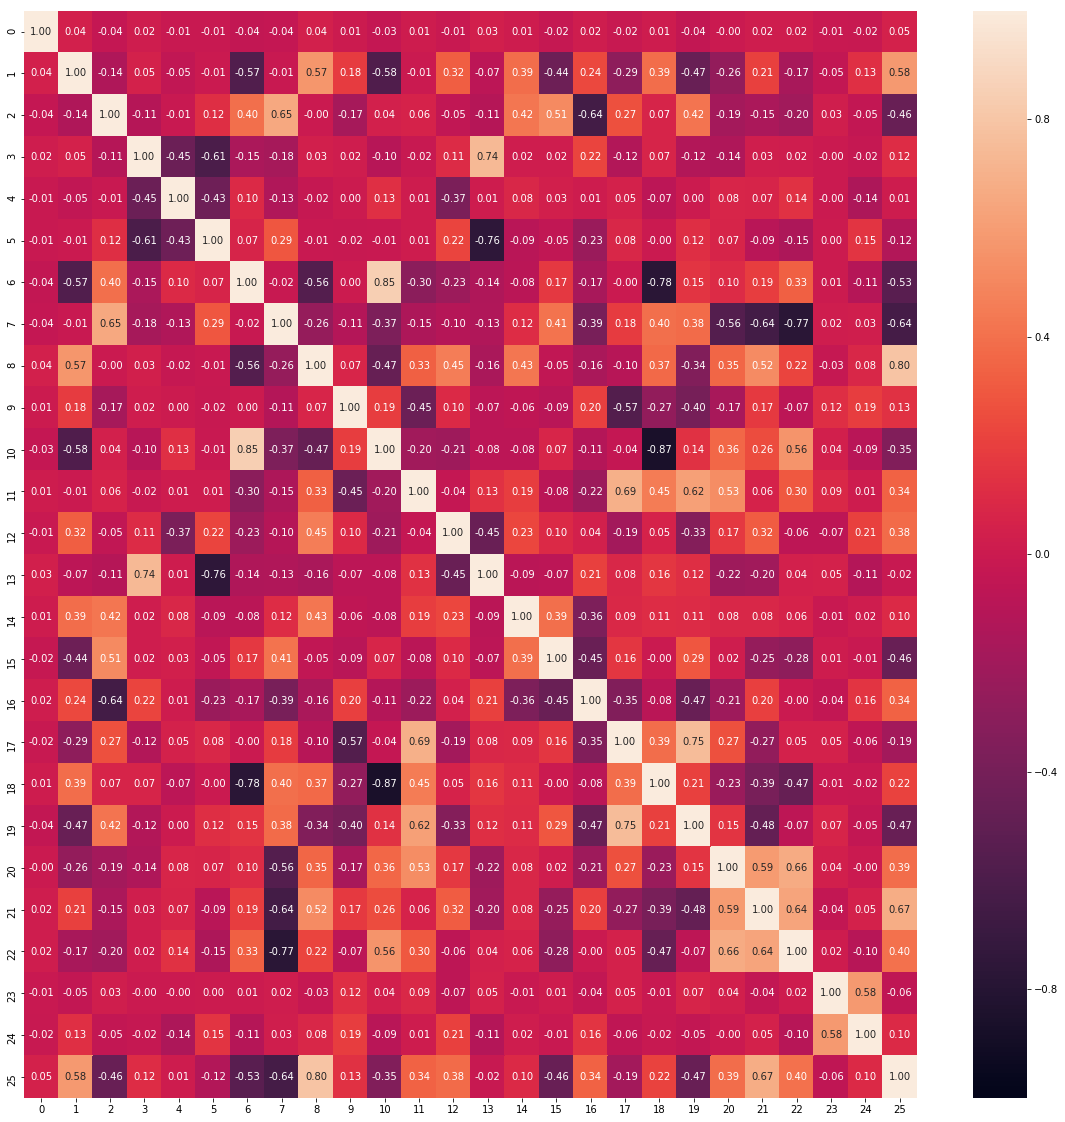

In [7]:
import pandas as pd
data = pd.DataFrame(npdata, dtype = np.float32)
print(data.describe())
data.dtypes
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))   
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")